## Part 3 begins here.

The plan for part 3.

##### divide columns into 3 groups
1. keepers (13)
    * date_installed
    * cost_per_watt
    * cost
    * size_kw
    * state                         
    * zipcode                       
    * city                          
    * county       
    * install_type
    * new_const
    * tracking
    * 3rd_party
    * appraised
<br>
2. Decide later - maybe useful in story/model (6)
    * incentive_prog_names 
    * utility_clean 
    * tech_1
    * model1_clean
    * installer
    * bipv_1
<br>    
3. don't keep (19)
    * LBNL internal
        * type (gone already)
        * lbnl_tts_version_year 
        * lbnl_tts 
        * year 
    * physical parameter of installation
        * annual_PV_prod 
        * annual_insolation 
        * azimuth1 
        * tilt1 
        * tracking_type 
        * reported_annual_energy_prod 
    * financial (beyond scope)
        * rebate 
        * sales_tax_cost 
        * pbi_length
    * manufacturer information
        * manuf2_clean
        * manuf3_clean
        * manuf1_clean 
        * inv_man_clean 
        * bipv_2
        * bipv_2

##### Drop "don't keep" category

##### Save data as csv

### Start by loading up

In [1]:
# %load ../pycode/setup.py
# set up
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements.'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

def min015099max(series):
    ''' return list of [ min, 1%, median, 99%, max ] series values '''
    vals = list(np.percentile(series, [1.0, 50.0, 99.0]))
    vals.insert(-1, series.max())
    vals.insert(0, series.min())
    return vals

# ss = np.arange(1, 101)
# min_1_50_99_max(ss)             

def mid98(series):
    '''  return middle 98% of series '''
    bounds = series.quantile([0.01, 0.99])
    return(series[(series > bounds.values[0]) & (series < bounds.values[1])])

# ss = np.arange(1, 101)
# min_1_50_99_max(ss)

In [2]:
dfFull = pd.read_csv('../local/data/live_20171219_1.csv', index_col='date_installed', 
                     parse_dates=True, dtype={'zipcode' : np.object})

C:\Users\saus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
theColumns = dict(enumerate(dfFull.columns))

In [4]:
# which columns have mixed type at this point
[theColumns[col] for col in (19,29,31)]
# okay, these are on the chopping block already

['sales_tax_cost', 'pbi_length', 'bipv_3']

In [5]:
dfLive = dfFull[['cost_per_watt', 'cost', 'size_kw',
                 'state', 'zipcode', 'city', 'county',
                 'install_type', 'new_constr', 'tracking', '3rdparty',
                 'appraised', 'incentive_prog_names', 'utility_clean',
                 'tech_1', 'model1_clean', 'installer', 'bipv_1']]

In [6]:
# looking good
dfLive.head()

,cost_per_watt,cost,size_kw,state,zipcode,city,county,install_type,new_constr,tracking,3rdparty,appraised,incentive_prog_names,utility_clean,tech_1,model1_clean,installer,bipv_1
date_installed,,,,,,,,,,,,,,,,,,
1909-07-07,NaN,NaN,4.90,IN,47401,Bloomington,NaN,residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stumpner,NaN
1909-07-07,NaN,NaN,7.35,IN,47401,Bloomington,NaN,residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stumpner,NaN
1909-07-07,NaN,NaN,3.90,IN,47408,Bloomington,NaN,residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stumpner,NaN
1909-07-07,NaN,NaN,9000.00,IN,46222,Indianapolis,NaN,commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JMS,NaN
1969-12-31,5.9,32568.0,5.52,FL,32653,NaN,Alachua,residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# rename columns for convenience
dfLive.columns = ['cost_per_watt', 'cost', 'size_kw',
                 'state', 'zipcode', 'city', 'county',
                 'install_type', 'new_constr', 'tracking', 'third_party',
                 'appraised', 'incentive', 'utility',
                 'tech', 'model', 'installer', 'bipv']

In [8]:
dfLive.head()

,cost_per_watt,cost,size_kw,state,zipcode,city,county,install_type,new_constr,tracking,third_party,appraised,incentive,utility,tech,model,installer,bipv
date_installed,,,,,,,,,,,,,,,,,,
1909-07-07,NaN,NaN,4.90,IN,47401,Bloomington,NaN,residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stumpner,NaN
1909-07-07,NaN,NaN,7.35,IN,47401,Bloomington,NaN,residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stumpner,NaN
1909-07-07,NaN,NaN,3.90,IN,47408,Bloomington,NaN,residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stumpner,NaN
1909-07-07,NaN,NaN,9000.00,IN,46222,Indianapolis,NaN,commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JMS,NaN
1969-12-31,5.9,32568.0,5.52,FL,32653,NaN,Alachua,residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# how many per year
byYear = dfLive.groupby(dfFull.index.year)
byYear.size()

date_installed
1909         4
1969       119
1983         2
1984         1
1986         1
1988         1
1992         1
1994        11
1995        14
1996        27
1997       104
1998        98
1999      1428
2000       625
2001      2890
2002      5524
2003      7080
2004     10963
2005     10682
2006     17360
2007     29472
2008     32409
2009     53681
2010     78182
2011     88620
2012    121354
2013    122679
2014    170873
2015    265750
2016       349
2017       212
dtype: int64

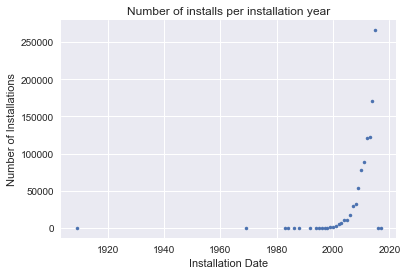

In [10]:
# plot data size per year
byYear.size().plot( marker='.', linestyle='none')
plt.title('Number of installs per installation year')
plt.ylabel('Number of Installations')
plt.xlabel('Installation Date');

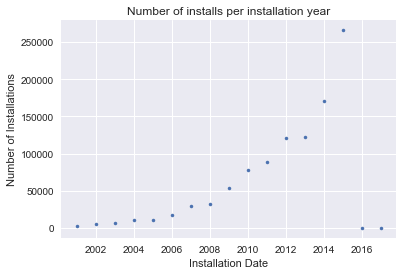

In [11]:
# zoom in a little on recent
bYsizes = byYear.size()
bYsizes[bYsizes.index > 2000].plot(marker='.', linestyle='none')
plt.title('Number of installs per installation year')
plt.ylabel('Number of Installations')
plt.xlabel('Installation Date');

In [12]:
# what fraction is that 11 from 2005 to 2015 years of the total? 96%
byYearSize = byYearSize = byYear.size()
byYearSize[(byYearSize.index >= 2004) & (byYearSize.index < 2016)].sum()/byYearSize.sum()

0.98188073484394167

#### focus on the years 2004 though 2015 (12 years)

Capture installations before 2004 in dfEarly and installations after 2015 in dfLate.  Capture 2004 though 2015 in dfLive.

In [13]:
dfEarly = dfLive.loc[dfLive.index.year < 2004]

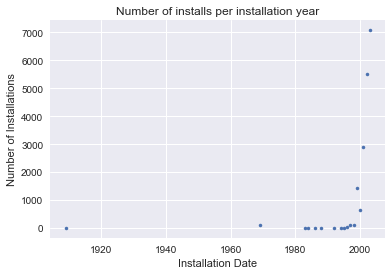

In [14]:
dfEarly.groupby(dfEarly.index.year).size().plot(marker='.', linestyle='none')
plt.title('Number of installs per installation year')
plt.ylabel('Number of Installations')
plt.xlabel('Installation Date');

In [15]:
dfLate = dfLive.loc[dfLive.index.year > 2015]

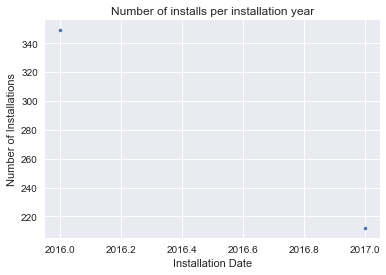

In [16]:
dfLate.groupby(dfLate.index.year).size().plot(marker='.', linestyle='none')
plt.title('Number of installs per installation year')
plt.ylabel('Number of Installations')
plt.xlabel('Installation Date');

In [17]:
# save this, just in cast
dfAllYears = dfLive.copy()

In [18]:
dfLive = dfLive.loc[(dfLive.index.year > 2003)& (dfLive.index.year <= 2015)]

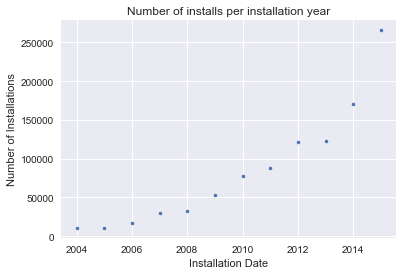

In [19]:
dfLive.groupby(dfLive.index.year).size().plot(marker='.', linestyle='none')
plt.title('Number of installs per installation year')
plt.ylabel('Number of Installations')
plt.xlabel('Installation Date');

In [20]:
dfLive.groupby(dfLive.index.year).size()

date_installed
2004     10963
2005     10682
2006     17360
2007     29472
2008     32409
2009     53681
2010     78182
2011     88620
2012    121354
2013    122679
2014    170873
2015    265750
dtype: int64

In [21]:
dfLive.to_csv('../local/data/live20171229.csv')

In [23]:
dfLive.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1002025 entries, 2004-01-01 to 2015-12-31
Data columns (total 18 columns):
cost_per_watt    745516 non-null float64
cost             745629 non-null float64
size_kw          1002025 non-null float64
state            1002025 non-null object
zipcode          1002025 non-null object
city             788849 non-null object
county           980790 non-null object
install_type     966720 non-null object
new_constr       27098 non-null float64
tracking         1920 non-null float64
third_party      306989 non-null float64
appraised        223431 non-null object
incentive        788415 non-null object
utility          783186 non-null object
tech             580399 non-null object
model            580399 non-null object
installer        694390 non-null object
bipv             5252 non-null float64
dtypes: float64(7), object(11)
memory usage: 165.3+ MB
